In [15]:
from PIL import Image, ImageFilter

# Load the color image of Jotaro
image = Image.open('/Users/jimimichael/Desktop/Computer-Vision/CV-Hw1/Jotaro.jpg').convert("RGB")

def applyKernel(kernel, image):
    width = image.width
    height = image.height
    kernelSize, kernelValues = kernel

    # Create an output image with the same dimensions as the input
    outputImage = Image.new("RGB", (width, height))

    #Iterate over each pixel
    for x in range(width):
        for y in range(height):
            newPixel = [0, 0, 0]
            # Iterate over the kernel
            for kx in range(kernelSize[0]):
                for ky in range(kernelSize[1]):
                    # Calculate the pixel coordinates with bounds checking
                    px = x + kx - kernelSize[0] // 2
                    py = y + ky - kernelSize[1] // 2

                    #Check bounds
                    if 0 <= px < width and 0 <= py < height:
                        # Get the pixel value from the input image
                        pixel = image.getpixel((px, py))
                        
                        # Multiply the pixel value by the corresponding kernel value
                        newPixel[0] += pixel[0] * kernelValues[ky * kernelSize[0] + kx]
                        newPixel[1] += pixel[1] * kernelValues[ky * kernelSize[0] + kx]
                        newPixel[2] += pixel[2] * kernelValues[ky * kernelSize[0] + kx]

            #New pixel value
            outputImage.putpixel((x, y), (int(newPixel[0]), int(newPixel[1]), int(newPixel[2])))

    return outputImage


In [16]:
# Map of kernels
kernels = {
    'A': ((3, 3), [0, 0, 0, 0, 1, 0, 0, 0, 0]),
    'B': ((3, 3), [1/9, 1/9, 1/9, 1/9, 1/9, 1/9, 1/9, 1/9, 1/9]),
    'C': ((3, 3), [0, 0, 0, -1, 0,  1, 0, 0, 0]),
    'D': ((5, 5), [0.003, 0.013, 0.022, 0.013, 0.003, 0.013, 0.059, 0.097, 0.059, 0.013, 0.022, 0.097, 0.159, 0.097, 0.022, 0.013, 0.059, 0.097, 0.059, 0.013, 0.003, 0.013, 0.022, 0.013, 0.003]),
    'E': ((3, 3), [-1, -1, -1, -1, 9, -1, -1, -1, -1]),
    #C on D
    'F': convolveKernels(((3, 3), [0, 0, 0, -1, 0, 1, 0, 0, 0]), ((5, 5), [0.003, 0.013, 0.022, 0.013, 0.003, 0.013, 0.059, 0.097, 0.059, 0.013, 0.022, 0.097, 0.159, 0.097, 0.022, 0.013, 0.059, 0.097, 0.059, 0.013, 0.003, 0.013, 0.022, 0.013, 0.003]))
}

In [17]:
#Similar to applyKernel, but running a kernel on another kernel. For kernel F
def convolveKernels(kernel1, kernel2):
    kernel1Size, kernel1Values = kernel1
    kernel2Size, kernel2Values = kernel2
    
    #output size
    outputSizeX = kernel1Size[0] + kernel2Size[0] - 1
    outputSizeY = kernel1Size[1] + kernel2Size[1] - 1

    # Create an output kernel with the calculated size
    outputKernel = [(outputSizeX, outputSizeY), [0] * (outputSizeX * outputSizeY)]

    # Iterate over each pixel in the output kernel
    for x in range(outputSizeX):
        for y in range(outputSizeY):
            newPixel = 0
            # Iterate over kernel1
            for kx1 in range(kernel1Size[0]):
                for ky1 in range(kernel1Size[1]):
                    #Get coordinates
                    px2 = x - kx1
                    py2 = y - ky1

                    #Check if in bounds
                    if 0 <= px2 < kernel2Size[0] and 0 <= py2 < kernel2Size[1]:
                        # Multiply the values from kernel1 and kernel2
                        newPixel += kernel1Values[ky1 * kernel1Size[0] + kx1] * kernel2Values[py2 * kernel2Size[0] + px2]

            #New pixel value
            outputKernel[1][y * outputSizeX + x] = newPixel

    return outputKernel


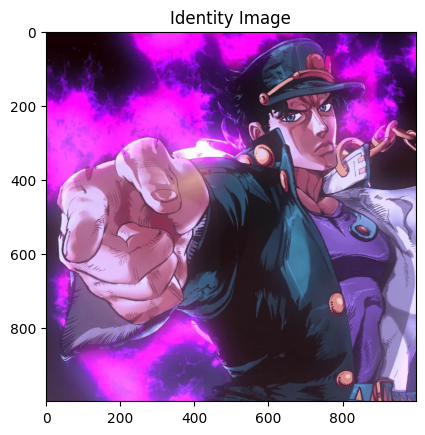

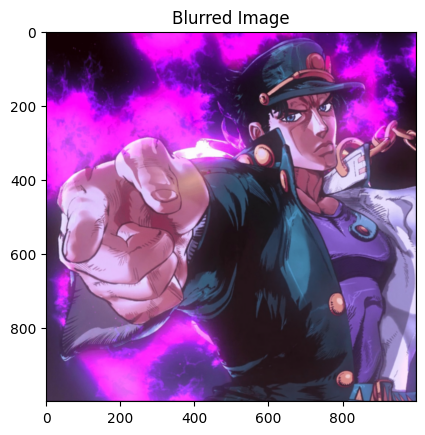

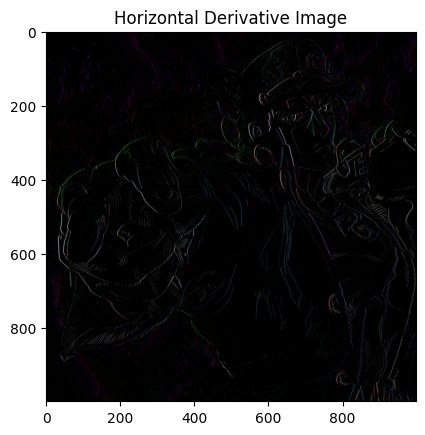

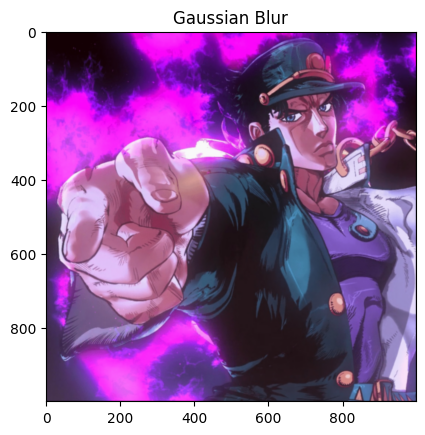

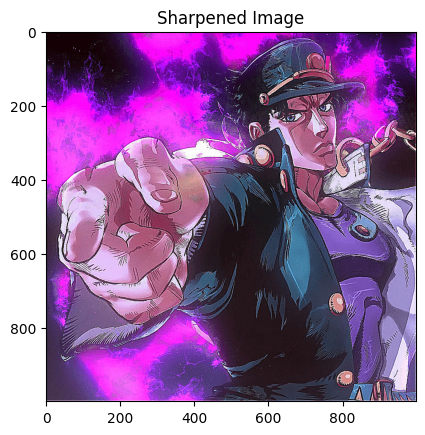

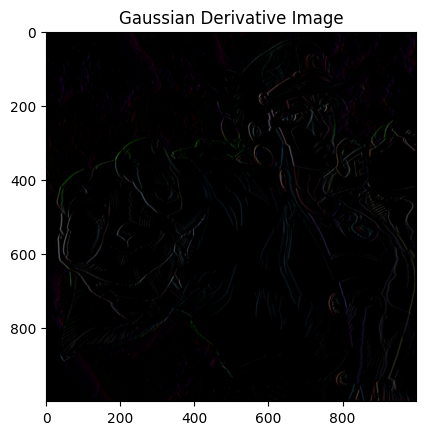

In [18]:
import matplotlib.pyplot as plt

#Identity
identityImage = applyKernel(kernels['A'], image)
plt.imshow(identityImage)
plt.title('Identity Image')
plt.show()

#Blurred
blurredImage = applyKernel(kernels['B'], image)
plt.imshow(blurredImage)
plt.title('Blurred Image')
plt.show()

#Horizontal Derivitave
horizontalImage = applyKernel(kernels['C'], image)
plt.imshow(horizontalImage)
plt.title('Horizontal Derivative Image')
plt.show()

#Gaussian Blur
gaussianImage = applyKernel(kernels['D'], image)
plt.imshow(gaussianImage)
plt.title('Gaussian Blur')
plt.show()

#Sharpened
sharpenedImage = applyKernel(kernels['E'], image)
plt.imshow(sharpenedImage)
plt.title('Sharpened Image')
plt.show()

#Gaussian Derivative
gaussianDerivativeImage = applyKernel(kernels['F'], image)
plt.imshow(gaussianDerivativeImage)
plt.title('Gaussian Derivative Image')
plt.show()
